<a href="https://colab.research.google.com/github/sugban/Spark-Internship/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform **‘Exploratory Data Analysis’** on dataset **‘SampleSuperstore’**<br>
● As a business manager, try to find out the weak areas where you can
work to make more profit.<br>
● What all business problems you can derive by exploring the data?

In [4]:
!pip install geocoder
!pip install geopy 
!pip install folium
!pip install plotnine

     |████████████████████████████████| 98 kB 3.0 MB/s 


In [5]:
from geopy.geocoders import Nominatim
from plotnine import *

import folium
import geocoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_csv("/content/drive/My Drive/SPARK Internship/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
df.drop(columns='Country',inplace=True)

**Carryout Summary statistics**<br>
We can even compute some basic statistics of the DataFrame ‘df’ using the describe() function.<br> The describe() function of the Pandas DataFrame lists eight statistical properties of each attribute.<br>It can be performed on columns that contain numeric data.

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Data types may come in a wrong format which makes analysis difficult, for instance a column supposed to contain numeric data may be stored as string or a column supposed to contain categorical data stored as a string. Hence it always necessary to check the data type and if needed to convert to suitable data types to improve ease of analysis.

In [12]:
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [13]:
df.shape

(9994, 12)

In [14]:
# to check dupliaction in datset

df.duplicated().sum()

17

We found out 17 duplicate rows <br>

So we'll delete those rows by drop()

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(9977, 12)

 to find the unique values across the dataframe

In [17]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

We can see that there is 4 shipping mode among 49 states and 531 cities.<br>The datasets are segmented in 3 types of customers.<br>
The products are also divided in 3 categories

###Correlation between all pairs of attributes
Pearson’s Correlation Coefficient can be computed between all pairs of attributes of the DataFrame ‘df’ using Pandas corr() function. Here, it is assumed that each attribute follows a normal distribution. A full negative and full positive correlations are denoted using the values -1 and 1, respectively. On the other hand, a value of 0 indicates no correlation at all.

In [18]:
df1=df[['Sales','Quantity','Discount','Profit']]
corr=df1.corr(method='pearson')
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


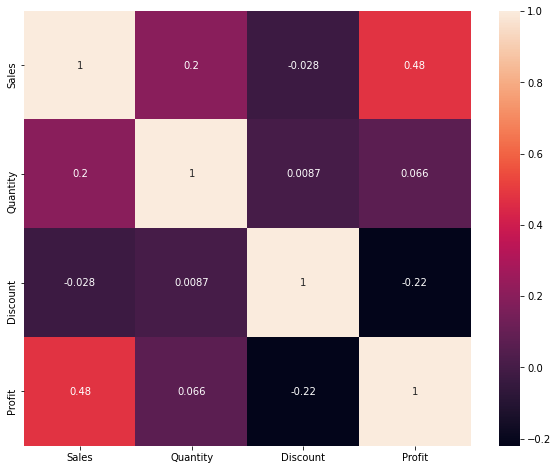

In [19]:
# correaltion visualization through heat map
fig, ax = plt.subplots(figsize=(10,8))         
sns.heatmap(corr,ax=ax,annot=True)

Sales and profit are positively correalted though discount and profit has no correlation to each other.

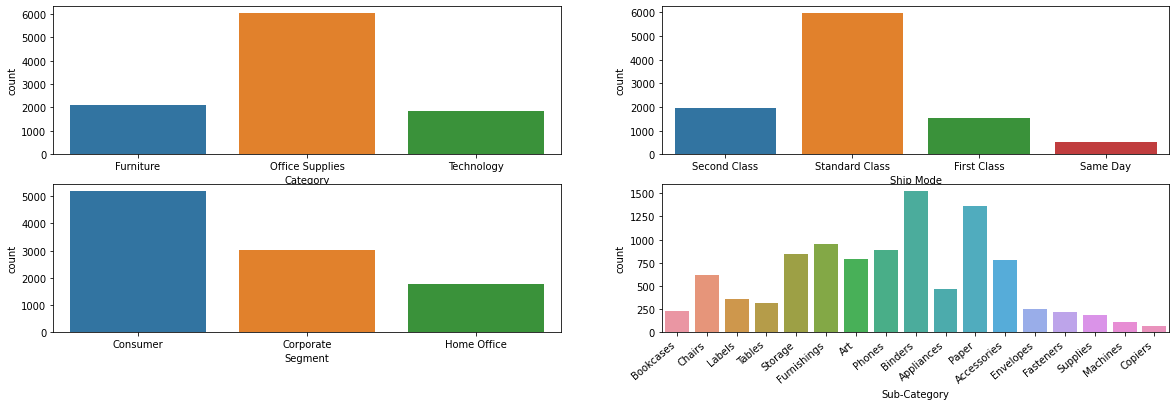

In [20]:
fig = plt.figure(figsize=(20,6))

plt.subplot(2, 2, 1)
sns.countplot(x='Category',data=df)

plt.subplot(2, 2, 2)
sns.countplot(x='Ship Mode',data=df)

plt.subplot(2, 2, 3)
sns.countplot(x='Segment',data=df)

plt.subplot(2, 2, 4)
ax=sns.countplot(x='Sub-Category',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [22]:
shipmode = df.groupby('Ship Mode')['Sales','Profit'].sum().reset_index()
shipmode

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Ship Mode,Sales,Profit
0,First Class,3.513805e+05,48953.6561
1,Same Day,1.283217e+05,15871.8869
2,Second Class,4.591770e+05,57446.6516
3,Standard Class,1.357316e+06,163969.2280


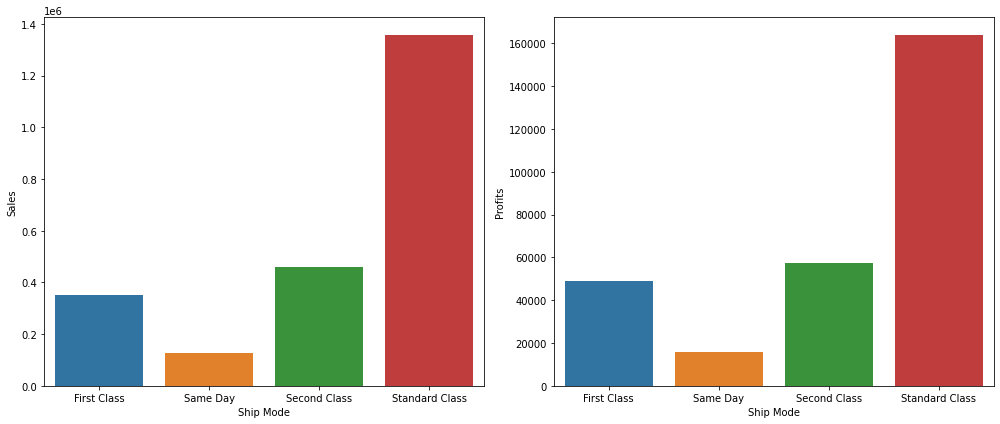

In [24]:
fig,axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=shipmode['Ship Mode'],y=shipmode['Sales'],data=df,ax=axes[0])
axes[0].set_ylabel('Sales')

sns.barplot(x=shipmode['Ship Mode'],y=shipmode['Profit'],data=df,ax=axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

In [25]:
category = df.groupby('Category')['Sales','Profit'].sum().reset_index()
category

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sales,Profit
0,Furniture,741306.3133,18421.8137
1,Office Supplies,718735.2440,122364.6608
2,Technology,836154.0330,145454.9481


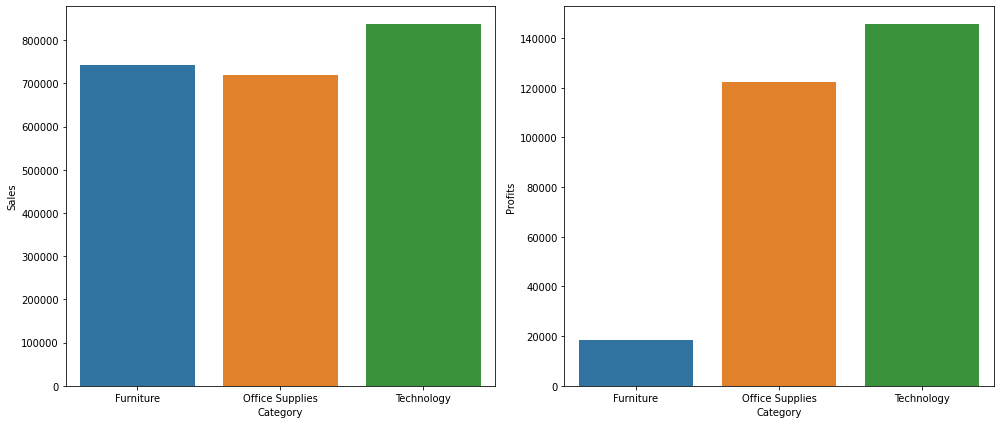

In [26]:
fig,axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=category['Category'],y=category['Sales'],data=df,ax=axes[0])
axes[0].set_ylabel('Sales')

sns.barplot(x=category['Category'],y=category['Profit'],data=df,ax=axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

In [27]:
segment = df.groupby('Segment')['Sales','Profit'].sum().reset_index()
segment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Segment,Sales,Profit
0,Consumer,1.160833e+06,134007.4413
1,Corporate,7.060701e+05,91954.9798
2,Home Office,4.292927e+05,60279.0015


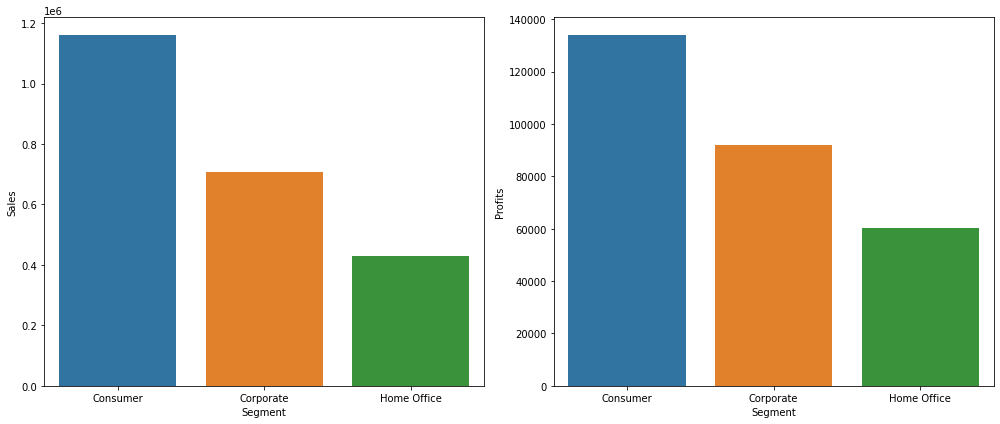

In [28]:
fig,axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=segment['Segment'],y=segment['Sales'],data=df,ax=axes[0])
axes[0].set_ylabel('Sales')

sns.barplot(x=segment['Segment'],y=segment['Profit'],data=df,ax=axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

In [38]:
top_states = df.groupby('State')['Profit'].sum().sort_values().reset_index().tail(10)
week_states = df.groupby('State')['Profit'].sum().sort_values().reset_index().head(10)

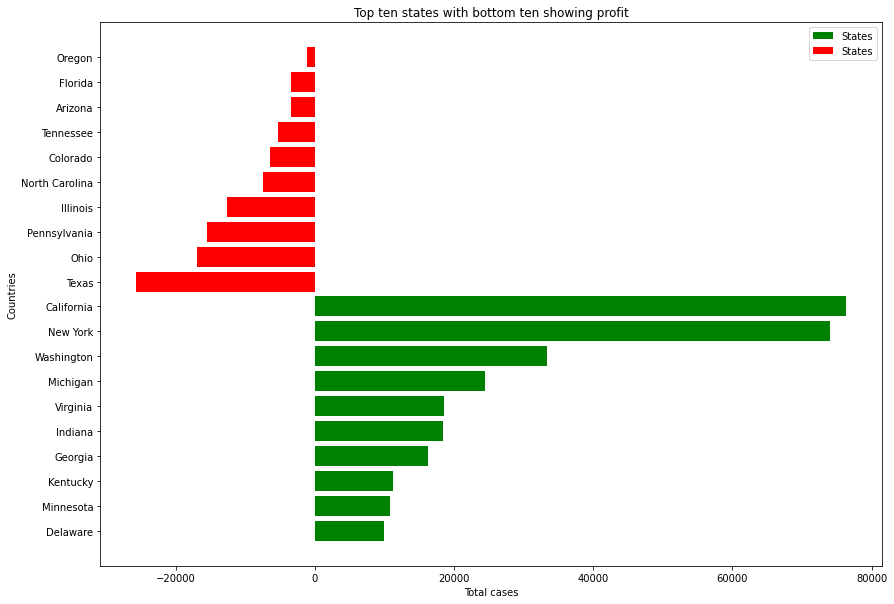

In [39]:
plt.figure(figsize=[14, 10])

plt.barh(top_states['State'], top_states['Profit'], label = "States", color = 'g')
plt.barh(week_states['State'], week_states['Profit'], label = "States", color = 'r')

plt.legend()

plt.xlabel('Profit')
plt.ylabel('States')

plt.title('Top ten states with bottom ten showing profit')

# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/mizani/palettes.py:439: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colorsReturning the palette you asked for withthat many colors
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/mizani/palettes.py:439: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colorsReturning the palette you asked for withthat many colors
  warnings.warn(msg)


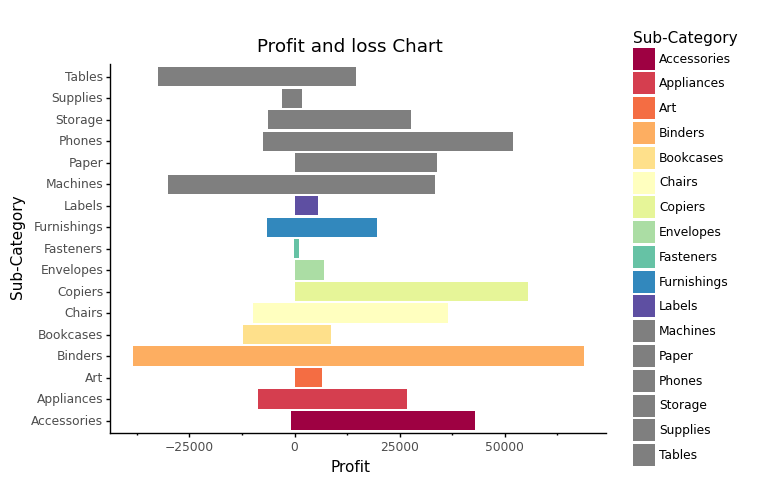

<ggplot: (8730164667253)>

In [55]:
Profit_plot=(ggplot(df,aes(x='Sub-Category', y='Profit', fill='Sub-Category'))+geom_col()+coord_flip()+scale_fill_brewer(type='div',palette="Spectral")+theme_classic()+ggtitle('Profit and loss Chart'))
display(Profit_plot)

**The profit and loss of each and every subcategories**<br> We can visualize that "binders" has faced the highest amount loss as well as profit amongst all other Sub-categories, Discount can be reason of this effect.<br>Copiers, phones and accessories has gained highest amount of profit with no loss, except phones.

In [76]:
df_category=pd.crosstab(df['Sub-Category'], df['Category'])
df_category.sort_values(by=['Furniture','Office Supplies','Technology'],ascending=False,inplace=True)

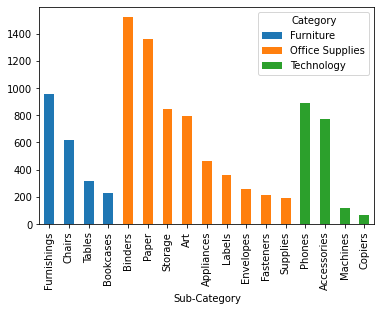

In [78]:
df_category.plot.bar(stacked=True)

The above plot show the count of sub categories among categories. We can see that office supplies (binders, paper) are in huge amount in comparison to others and also office supplies are more in variety than any other category. That means that purchase of office supplies are in greater demand. Among technology, customers demand for Accessories and Phones than any other tools. Customers prefer Furnishings and Chairs among furniture. <br> So we can see that the supplies or items to sell such as tables and bookcases in Furniture, appliances, labels, envelopes, fasteners and other supplies in Office supplies and in Technology Machines and copiers, comes in weaker demand or profit area.   

In [40]:
df_state=df['State']
df_state.drop_duplicates(inplace=True)
df_state.value_counts().sum()

49

In [41]:
state_dict ={}
for address in df_state.values:
  #print(address)
  geolocator = Nominatim(user_agent="ny_explorer")
  location = geolocator.geocode(address)
  latitude = location.latitude
  longitude = location.longitude
  state_dict[address]=[latitude,longitude]

In [42]:
state_address=pd.DataFrame(state_dict)
state_address=state_address.transpose().reset_index()
state_address.columns=['State','Latitude','Longitude']
state_address.to_csv('/content/drive/My Drive/SPARK Internship/State with LatLon.csv')

In [43]:
df=df.merge(state_address,how='inner',on='State')
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Latitude,Longitude
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,37.572603,-85.155141
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820,37.572603,-85.155141
2,Standard Class,Corporate,Richmond,Kentucky,40475,South,Office Supplies,Paper,5.78,1,0.0,2.8322,37.572603,-85.155141
3,Standard Class,Consumer,Henderson,Kentucky,42420,South,Office Supplies,Appliances,152.94,3,0.0,41.2938,37.572603,-85.155141
4,Standard Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,283.92,4,0.0,70.9800,37.572603,-85.155141


In [44]:
df_state=df.groupby(['State'])['Profit'].sum().reset_index()
df_state=df_state.merge(state_address,how='inner',on='State')
df_state.head()

,State,Profit,Latitude,Longitude
0,Alabama,5786.8253,33.258882,-86.829534
1,Arizona,-3427.9246,34.395342,-111.763275
2,Arkansas,4008.6871,35.204888,-92.447911
3,California,76330.7891,36.701463,-118.755997
4,Colorado,-6527.8579,38.725178,-105.607716


In [45]:
# create map of Region hovedstaden using latitude and longitude values
map_states = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, state, profit in zip(df_state['Latitude'], df_state['Longitude'], df_state['State'], round(df_state['Profit'],2)):
    label = '{}, {}'.format(state, profit)
    label = folium.Popup(label)
    folium.Marker(
                location=[lat,lng],
                popup=state,
                tooltip = profit
            ).add_to(map_states)  
    
map_states

The density plot helps us to visualize the distribution of an attribute

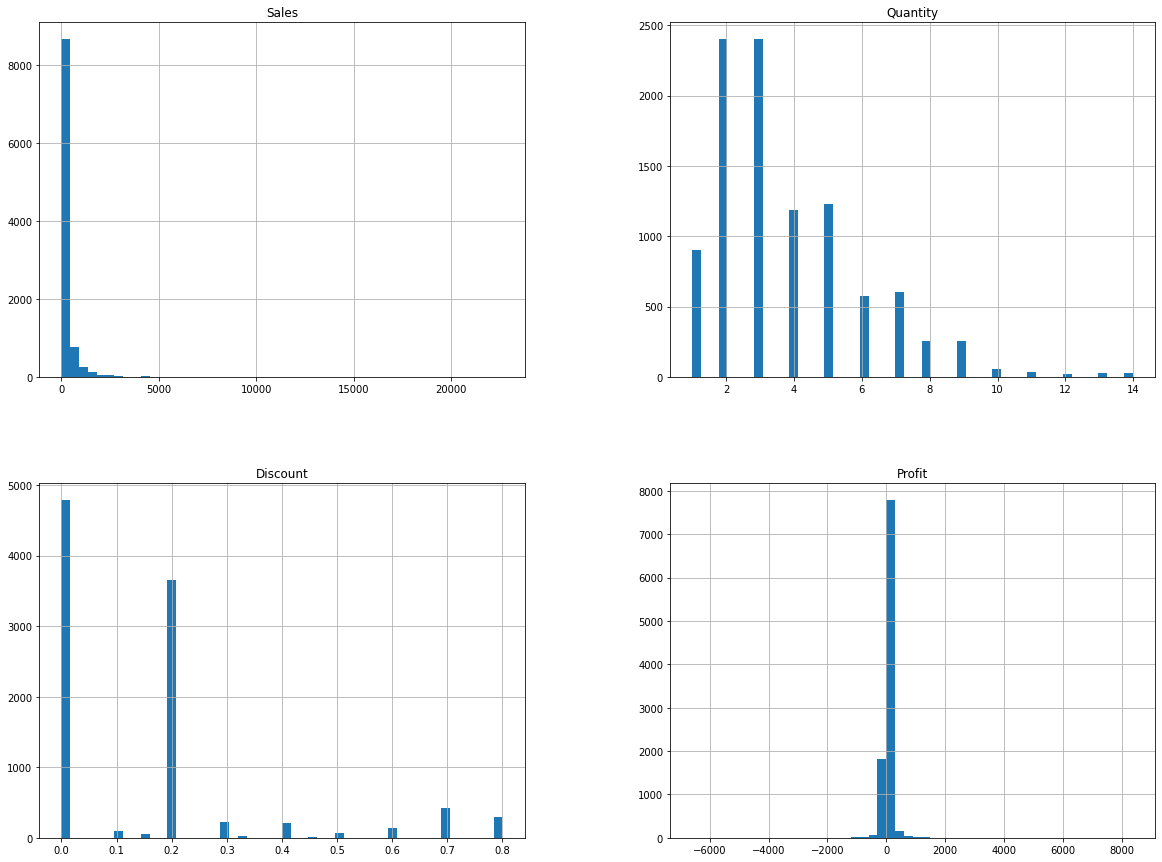

In [52]:
df_num=df[['Region','Sales','Quantity','Discount','Profit']]

df_num.hist(bins=50,figsize=(20,15))
plt.show()

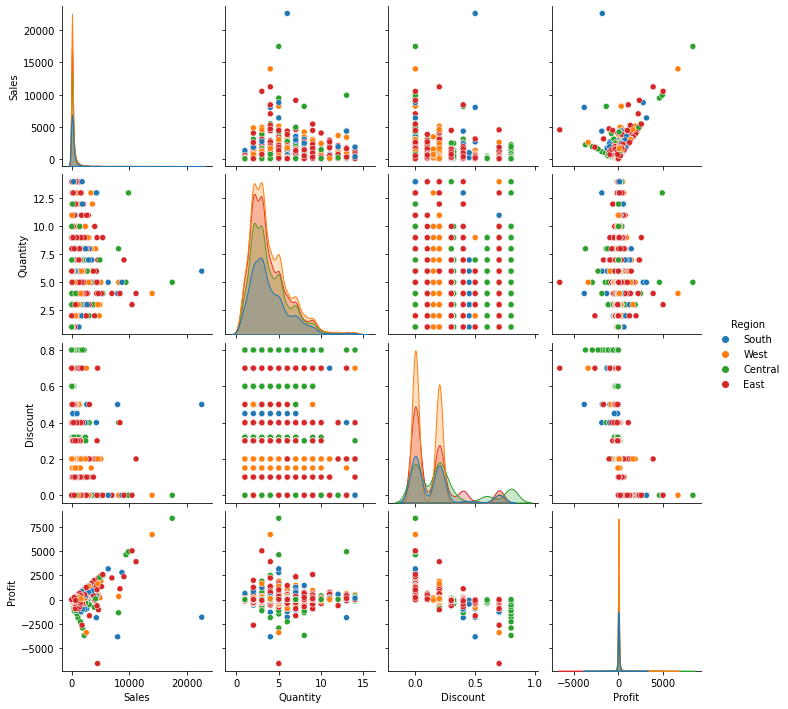

In [53]:
sns.pairplot(df_num,hue='Region')

Now we see that West and East region tend to have the highest profit expectancies and South has the lowest. So our week region is South, where we need to work more to promote the sales and profit.